In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
## Data loading & Understanding

data_df = pd.read_csv('/Users/nlili/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Checking for null values
data_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
data_df.shape

(7043, 21)

In [18]:
# Dropping customer id
data_df= data_df.drop(columns=['customerID'])



In [19]:
data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [22]:
## Printing unique values for all the column
data_df['gender'].unique

<bound method Series.unique of 0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object>

In [29]:
data_df[].unique

<bound method Series.unique of 0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object>

In [37]:
numerical_columns = ['tenure','MonthlyCharges','TotalCharges']

for col in data_df.columns:
    if col not in numerical_columns:
     print('Unique values in',col,'is', data_df[col].unique())

Unique values in gender is ['Female' 'Male']
Unique values in SeniorCitizen is [0 1]
Unique values in Partner is ['Yes' 'No']
Unique values in Dependents is ['No' 'Yes']
Unique values in PhoneService is ['No' 'Yes']
Unique values in MultipleLines is ['No phone service' 'No' 'Yes']
Unique values in InternetService is ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity is ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup is ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection is ['No' 'Yes' 'No internet service']
Unique values in TechSupport is ['No' 'Yes' 'No internet service']
Unique values in StreamingTV is ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies is ['No' 'Yes' 'No internet service']
Unique values in Contract is ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling is ['Yes' 'No']
Unique values in PaymentMethod is ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automati

In [44]:
## Converting totla charges into floating ( numerical values)


In [40]:
data_df[data_df['TotalCharges']==' '] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [41]:
len(data_df[data_df['TotalCharges']==' '] )

11

In [42]:
data_df['TotalCharges']= data_df['TotalCharges'].replace({' ':'0.0'})

In [43]:
len(data_df[data_df['TotalCharges']==' '] )

0

In [45]:
data_df['TotalCharges'] = data_df['TotalCharges'].astype(float)

In [46]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [52]:
## Understand the distribution of the target column to check if the classes are balanced properly
data_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
#insights

#1. Customer id removed
#2. No missing or null values
#3. Misisng values from total count removed which were present in the form of spcae
#4. Classis case of dependent variable imbalaance or class imbalance



In [57]:
## EDA 
## We can perform downsampling or upper sampling
data_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [60]:
data_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [62]:
data_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [72]:
# Numerical features analysis
#1. Understand the distribution of the numerical features

def plot_histogram(df, column_name):

    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

    # calculate mean and median for the column
    column_mean = data_df[column_name].mean()
    column_median = data_df[column_name].median()

    # add vertical lines for mean and median
    plt.axvline(column_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(column_median, color="green", linestyle="--", label="Median")

    plt.legend()
    plt.show()

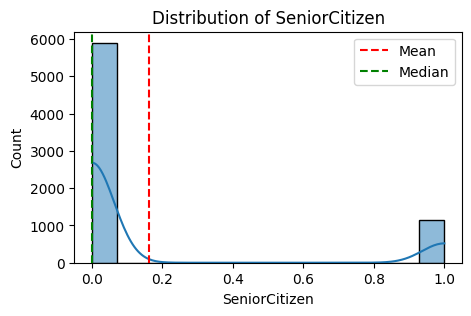

In [73]:
plot_histogram(data_df,"SeniorCitizen")

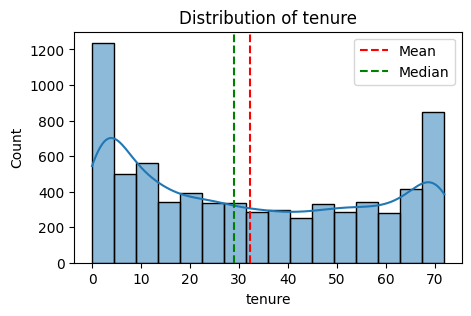

In [74]:
plot_histogram(data_df,"tenure")

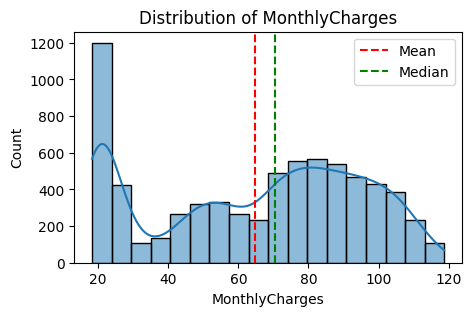

In [75]:
plot_histogram(data_df,"MonthlyCharges")

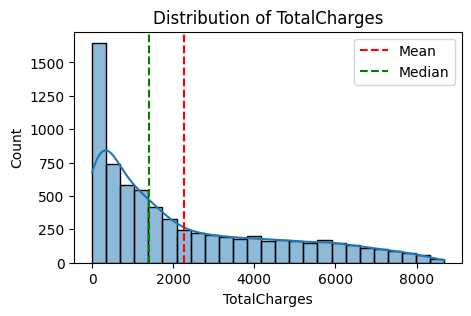

In [76]:
plot_histogram(data_df,"TotalCharges")

In [89]:
## bOx plot for numerical culmn helps us to identify any outlier

def box_plot(df, column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box-plot of {column_name}")
    plt.ylabel(column_name)
    plt.show()

    

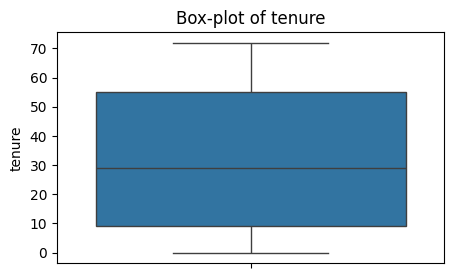

In [90]:
box_plot(data_df, "tenure")

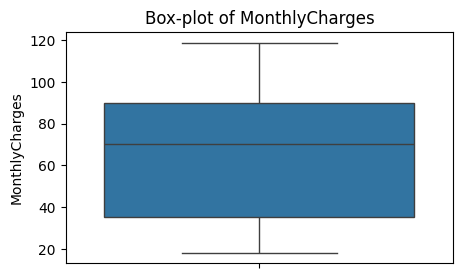

In [91]:
box_plot(data_df, "MonthlyCharges")

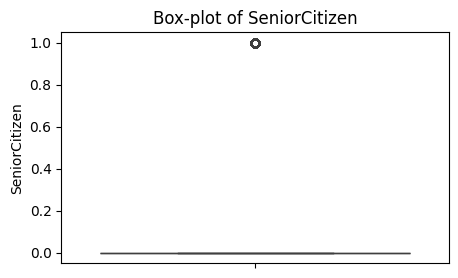

In [92]:
box_plot(data_df, "SeniorCitizen")

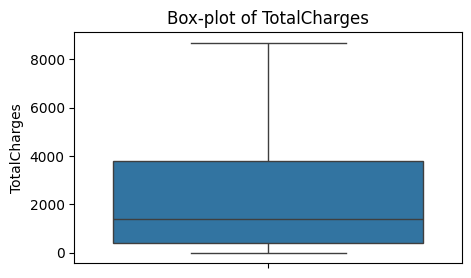

In [93]:
box_plot(data_df, "TotalCharges")

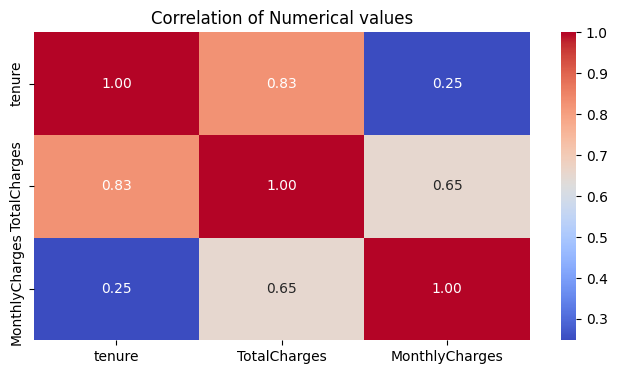

In [99]:
## correlation heatmap
plt.figure(figsize=(8,4))
sns.heatmap(data_df[["tenure","TotalCharges","MonthlyCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Numerical values")
plt.show()

## if two columns are highly correlated, then we will drop one column as this creates multicolleanearity

In [103]:
## Analysis on the categorical features 
data_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [104]:
df_categorical_columns= data_df.select_dtypes(include="object").columns.to_list()

In [105]:
df_categorical_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [106]:
df_categorical_columns= ['SeniorCitizen']+df_categorical_columns

In [107]:
df_categorical_columns

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

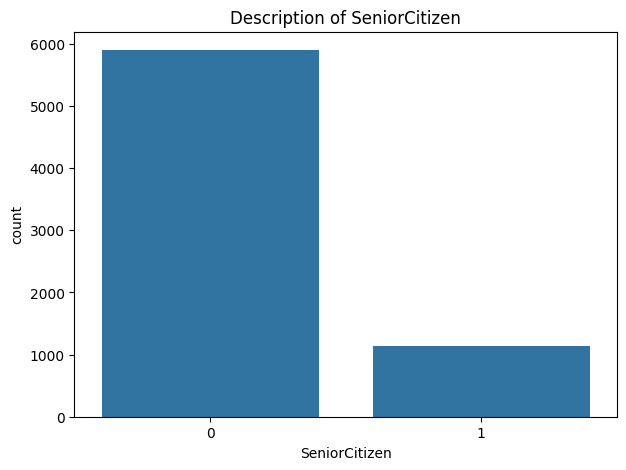

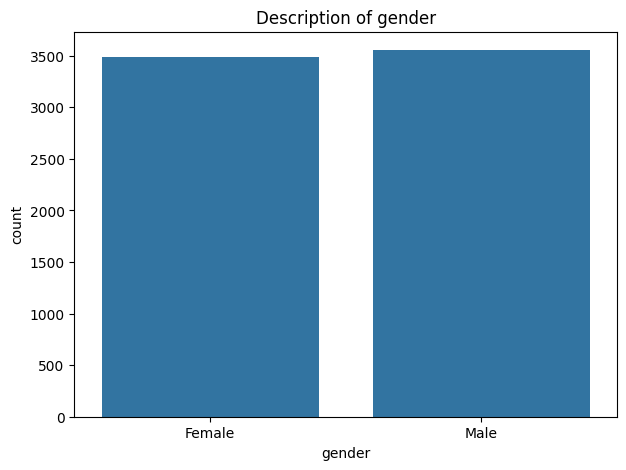

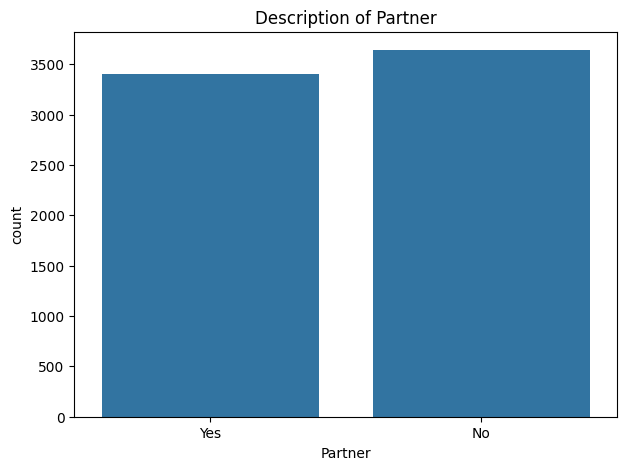

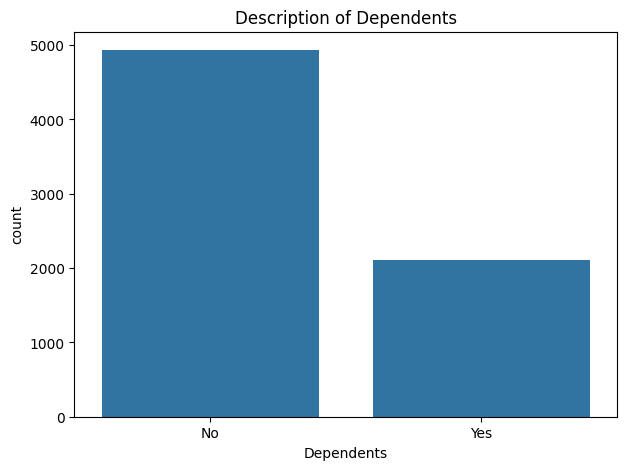

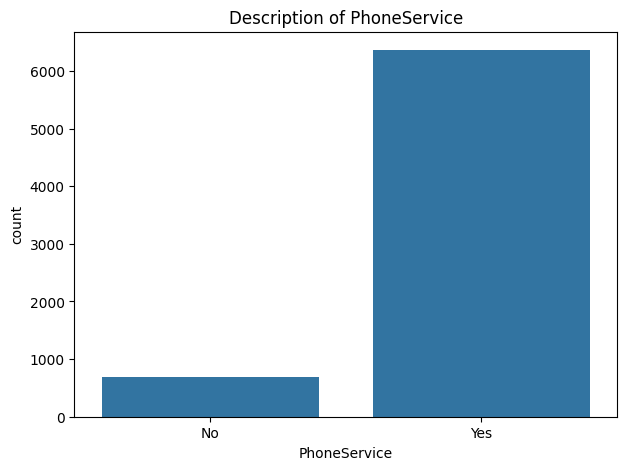

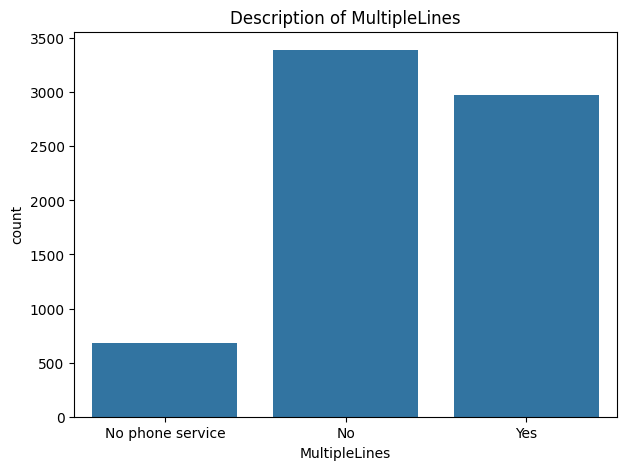

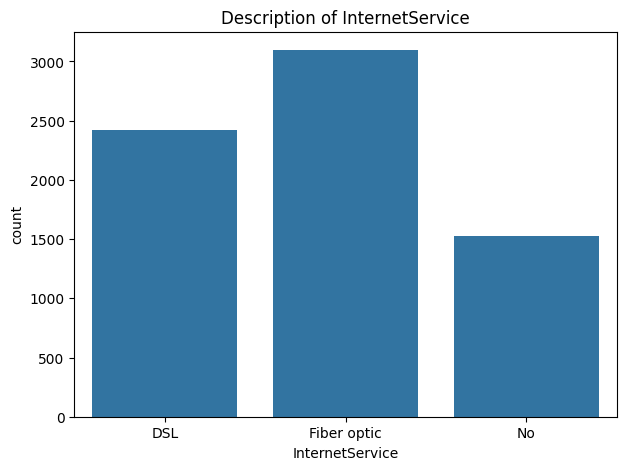

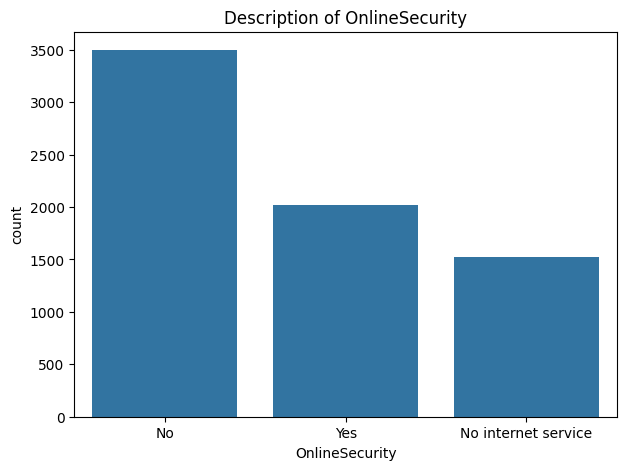

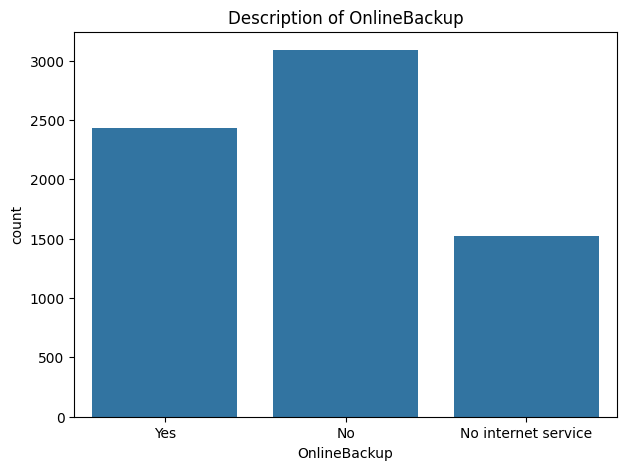

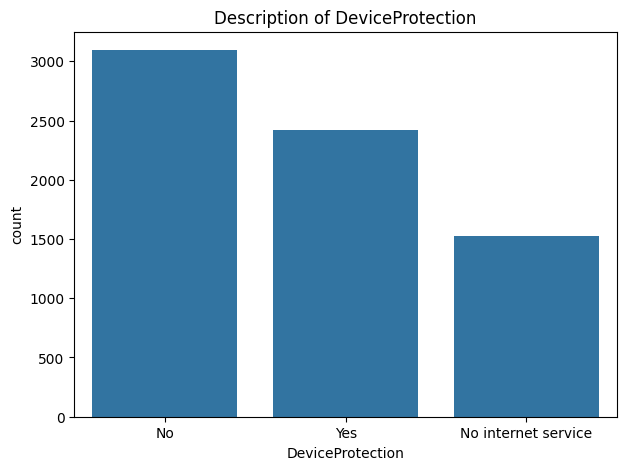

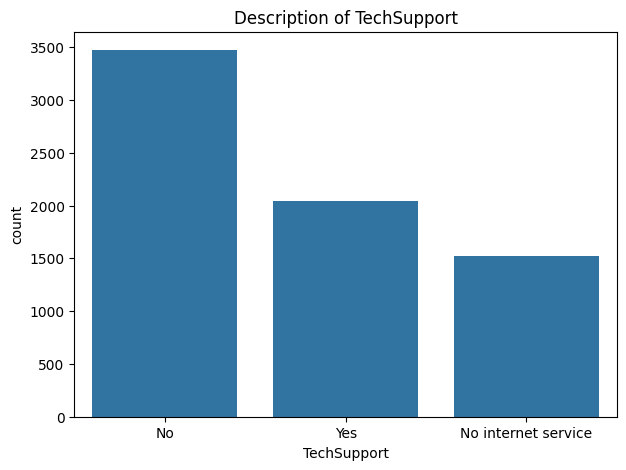

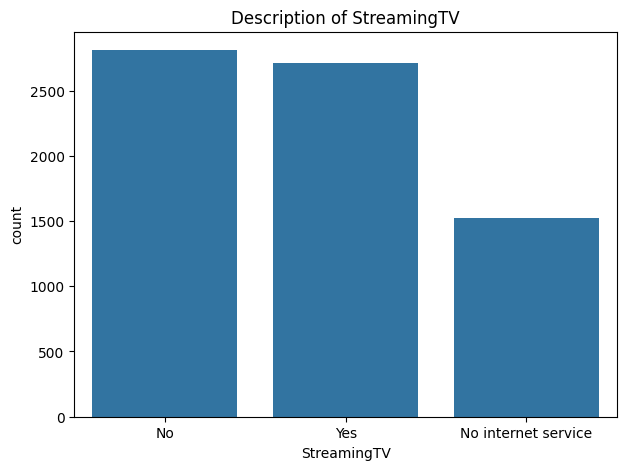

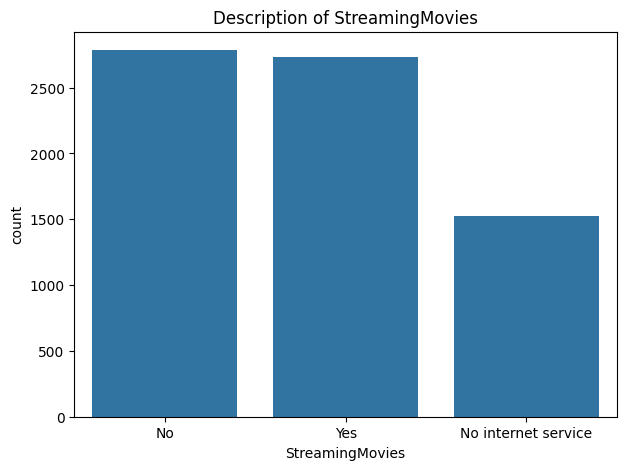

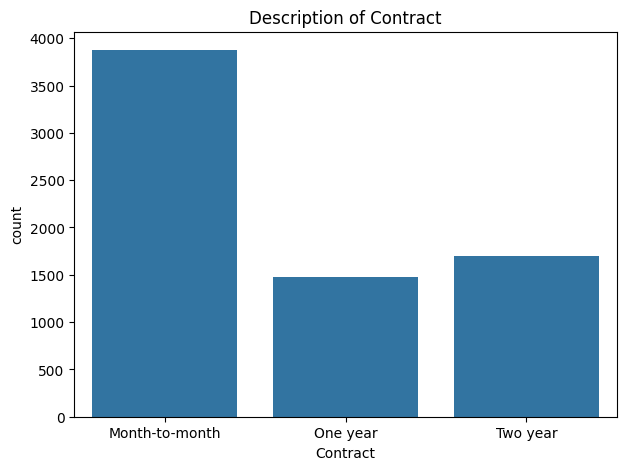

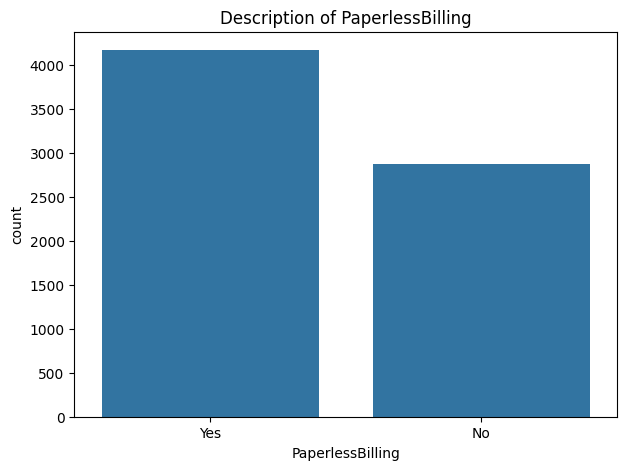

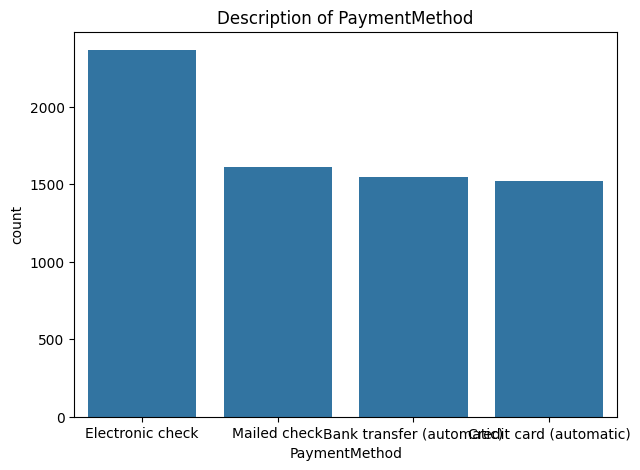

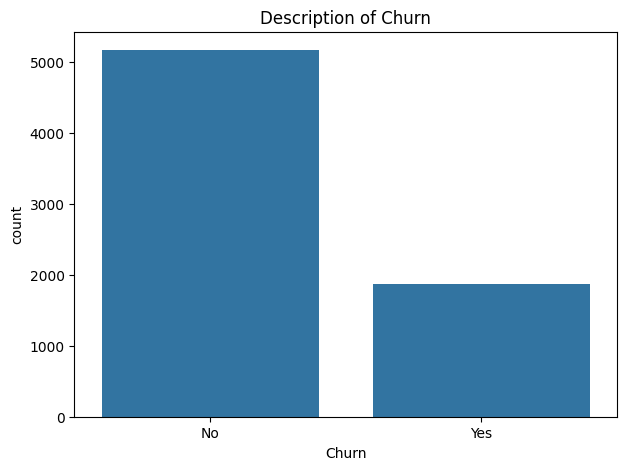

In [117]:
#count plot for categorical columns

for col in df_categorical_columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x=data_df[col])
    plt.title(f"Description of {col}")
    plt.show()
    

In [119]:
## Data preprocesing
#label encoding of chrun column
data_df["Churn"]= data_df["Churn"].replace({"Yes":1, "No":0})

In [121]:
data_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [125]:
print(data_df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [128]:
## Label encoding for categorical features
## identifying coulmns with object datatype

object_data = data_df.select_dtypes(include="object").columns.to_list()

In [129]:
object_data

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [132]:
# create label encodeer instances
encoders={}
# apply label encoding & save the encoder

for column in object_data:
    label_encoder= LabelEncoder()
    data_df[column]=label_encoder.fit_transform(data_df[column])
    encoders[column] = label_encoder

# save the encoder file to a pickle file
with open("encoders.pkl","wb")as f:
     pickle.dump(encoders, f)
    


In [134]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [139]:
## handle imbalnce in the target variable

## splitting the data set into target and test data set-
X= data_df.drop(columns=["Churn"])
y= data_df["Churn"]

In [145]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [146]:
#split training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [149]:
print(y_train.shape)

(5634,)


In [150]:
print(X_train.shape)

(5634, 19)


In [151]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [154]:
## SMOT- Synthetic Minority Oversampling Technique
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train,y_train)

In [156]:
print(X_train_smote.value_counts())

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
1       0              0        0           1       1             0              2                1               1             1                 1            1            1                0         1                 3              20.200000       20.20000        5
                                                                                 1                0               0             0                 0            0            0                0         1                 2              69.900000       69.90000        4
0       0              0        0           1       1             0              1                0               2             0                 0            0            0                0         1       

In [158]:
## Model training
## Training with default hyper-parameters
models = {"Decision Tree": DecisionTreeClassifier(random_state=42),
 "Random Forest": RandomForestClassifier(random_state=42),
 "XGBOOST": XGBClassifier(random_state=42)
}

In [164]:
## Dictory to store cross validation results
cv_scores = {}
# 5 folds cross validation for each model
for model_name, model in models.items():
     print("Training {model_name} with default parameters ")
     scores = cross_val_score(model,X_train_smote, y_train_smote, cv=5, scoring="accuracy")
     cv_scores[model_name]=scores
     print(f"{model_name} cross validation accuracy: {np.mean(scores):2f}")
     print("--"*50)
     

Training {model_name} with default parameters 
Decision Tree cross validation accuracy: 0.780220
----------------------------------------------------------------------------------------------------
Training {model_name} with default parameters 
Random Forest cross validation accuracy: 0.839670
----------------------------------------------------------------------------------------------------
Training {model_name} with default parameters 
XGBOOST cross validation accuracy: 0.831213
----------------------------------------------------------------------------------------------------


In [165]:
cv_scores

{'Decision Tree': array([0.68055556, 0.71903323, 0.81752266, 0.84350453, 0.84048338]),
 'Random Forest': array([0.72826087, 0.77220544, 0.90453172, 0.89305136, 0.90030211]),
 'XGBOOST': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

In [170]:
## Stratified K folds
## Random forest gives the highest accuracy compared to other model compared to other model

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote,y_train_smote) 

RandomForestClassifier(random_state=42)

In [171]:
## Model Evaluation
y_test_pred= model.predict(X_test)
print("Accuracy score:/n ", accuracy_score(y_test, y_test_pred))
print("Confusion matrix :/n ", confusion_matrix(y_test, y_test_pred))    
print("Classification Report:/n ", classification_report(y_test, y_test_pred))    

Accuracy score:/n  0.7821149751596878
Confusion matrix :/n  [[876 160]
 [147 226]]
Classification Report:/n                precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.59      0.61      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [175]:
## to increase th accuracy we can try hyperparameter tuning, stratified K folding

model_data = {"model":rfc, "feature_names":X.columns.tolist()}

## Save the trained model with pickle file
with open("customer_churn_model", "wb")as f:
    pickle.dump(model_data,f)

In [176]:
## load the saved model 
with open("customer_churn_model", "rb")as f:
    model_data= pickle.load(f)
